# 2D Lister

**Ide:** Putt en liste i en liste :O

Fint for å representere en tabell.

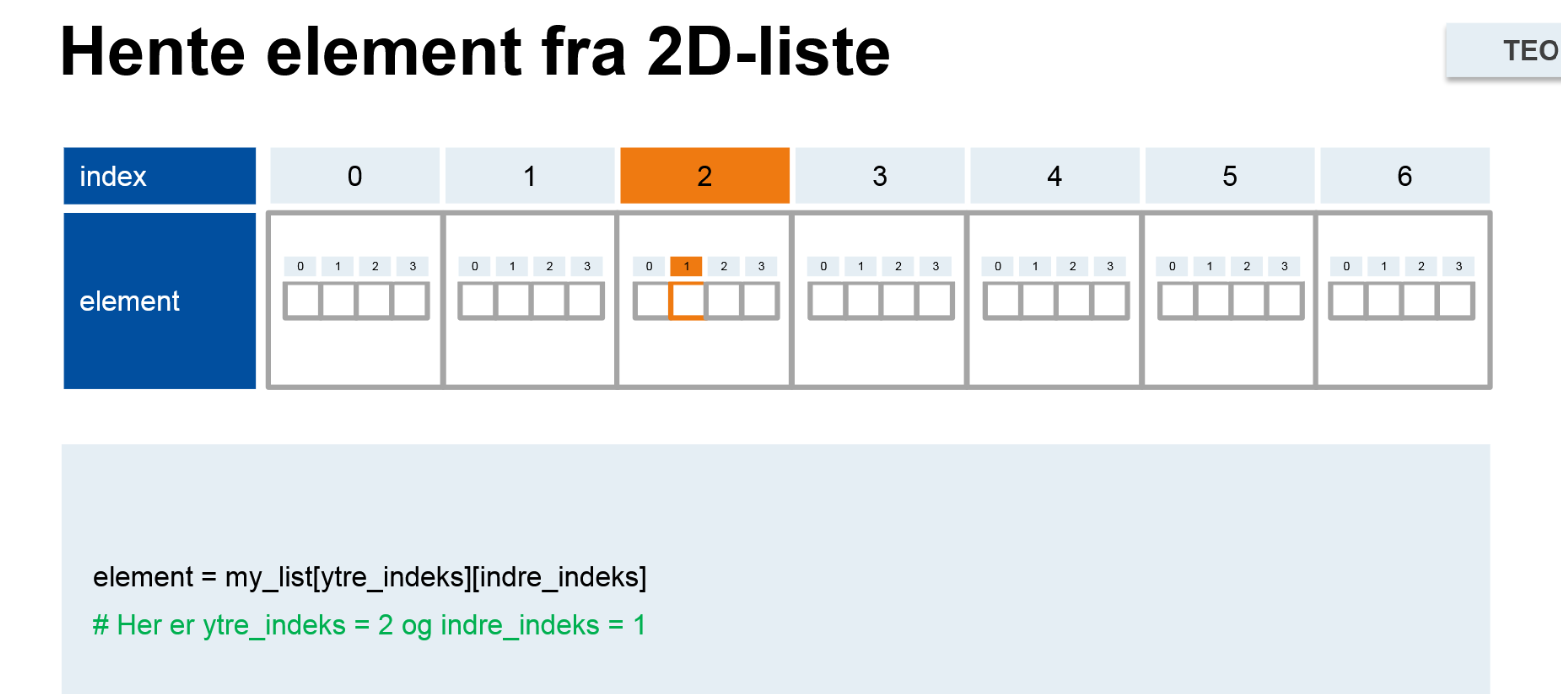

**Eksempel:** Man er gitt værdata ("sol", "overskyet", "regn" + temperatur + vindhastighet) for n dager. Hvordan kan man representere dette i Python?

La hver dag være representert av en liste som inneholder `værtype`, `temperatur` i celsius og `vindhastighet` i m/s, f. eks. `["sol", 18, 1.5]`. Hvordan jobber vi da med denne dataen?

In [ ]:
weather_some_random_day = ["sol", 18, 1.5]
weather_type = weather_some_random_day[0]
temperature = weather_some_random_day[1]
wind_speed = weather_some_random_day[2]

print(f"(1) Type: {weather_type}, temperatur: {temperature}, vindhastighet: {wind_speed}")

# eller
weather_type, temperature, wind_speed = weather_some_random_day
print(f"(2) Type: {weather_type}, temperatur: {temperature}, vindhastighet: {wind_speed}")

Nå har vi håndtert en dag. Hvordan kan vi da håndtere `n` dager?

In [ ]:
weather_some_other_day = ["regn", 10, 5.3]
weather_over_time = [weather_some_random_day, weather_some_other_day]
print(weather_over_time)

Ønsker å finne gjennomsnittstemperatur

In [ ]:
def find_average_temp(weather_list):
    total = 0
    for weather_one_day in weather_list:
        temp = weather_one_day[1]
        total += temp
    return total / len(weather_list) # len(weather_list) = antall dager

print(f"Gjennomsnitt: {find_average_temp(weather_over_time)}")

Det er gøy å spille discgolf en dag dersom
 - Det ikke regner
 - Temperaturen er over 10 grader
 - Vindhastigheten er under 3 m/s

La oss lage en funksjon som tar inn værdata som presentert over og gir oss en liste over hvilke dager det er gøy å spille discgolf på!

In [ ]:
# Lager en hjelpefunksjon som ser på en dag om gangen
def is_fun_day(weather_type, temp, wind_speed):
    if weather_type == "regn":
        return False
    elif temp <= 10: # Legg merke til at krav er OVER 10 grader
        return False
    else:
        return wind_speed < 3.0

def find_fun_days(weather_data):
    result = []
    for weather_type, temp, wind_speed in weather_data:
        result.append(is_fun_day(weather_type, temp, wind_speed))
    return result

print(f"Gode dager: {find_fun_days(weather_over_time)}")

Hva om vi ønsker å inkludere en grunn?

In [ ]:
# Utvider hjelpefunksjonen
def is_fun_day(weather_type, temp, wind_speed):
    if weather_type == "regn":
        return [False, "det regner!"]
    elif temp <= 10: # Legg merke til at krav er OVER 10 grader
        return [False, "det er kaldt :("]
    elif wind_speed >= 3.0:
        return [False, "blåser som bare det :/"]
    else:
        return [True, ""]

print(f"Gode dager: {find_fun_days(weather_over_time)}")

Men hva om det er flere?

In [ ]:
def is_fun_day(weather_type, temp, wind_speed):
    result = True
    reasons = []

    if weather_type == "regn":
        result = False
        reasons.append("det regner!")

    # Legg merke til at vi ikke bruker elif!
    if temp <= 10:
        result = False # Vi må oppdatere denne her og
        reasons.append("det er kaldt :(")
    
    if wind_speed >= 3.0:
        result = False
        reasons.append("det blåser som bare det :/")

    return [result, reasons]


print(f"Gode dager: {find_fun_days(weather_over_time)}")

La oss printe det på en fin måte!

In [ ]:
results = find_fun_days(weather_over_time)

dag = 0
for is_good_day, reasons in results:
    dag += 1
    if is_good_day:
        print(f"Dag {dag} er en flott dag for discgolf!")
    else:
        print(f"Dag {dag} er ikke en god dag for discgolf fordi {reasons[0]}", end="")
        for i in range(1, len(reasons)): # Dersom kun 1 grunn -> kjører ikke
            print(f", {reasons[i]}", end="")
        print()